## Fasttext

following tutorial https://fasttext.cc/docs/en/supervised-tutorial.html

## TODO
- prepare an input file with categories and their keywords
- prepare input file with categories and single keywords
- split datasets in training and validation
- run simple model settings (default as above)
- balance datasets for training 
 - feed GOOOGLE search words!

 
- try to use it as a word vectorizer and measure distance?

In [119]:
## load the data
import sys
# Add src folder to the path
sys.path.append('../src/')
from data.preprocess_keywords import make_cleaned_keywords_df
from data.make_datasets import get_data
# Specify wanted time range
start_date = '2021-01-01' #'2017-01-01' #'2020-01-01' #'2017-01-01'
end_date = '2022-01-01'
# Path to data
data_file = '/home/anya_m/data/dw-project-data/CMS_2010_to_June_2022_ENGLISH.json'
# Load and extract data within time range
df_subset = get_data(data_file, start_date, end_date)
# Cleans keywords and saves data as a dataframe
make_cleaned_keywords_df(df_subset, start_date, end_date)

Getting data...
Loading data DONE. Number of articles is 175659
Extracting data DONE. Number of articles from 2021-01-01 to 2022-01-01 is 10162
Cleaning step 1 out of 2 DONE. Number of unique keywords went from 14275 to 13302
Cleaning step 2 out of 2 DONE. Number of unique keywords went from 13302 to 12556
Finished. Data stored in ../data/interim/clean_keywords_2021-01-01_2022-01-01.json


In [120]:
# Load DW data
import pandas as pd
# start_date = '2017-01-01' #'2019-01-01' #'2021-01-01'
# end_date = '2022-01-01'
filepath = '../data/interim/clean_keywords_' + start_date + '_' + end_date + '.json'
df = pd.read_json(filepath, orient ='split', compression = 'infer')

In [121]:
df.head()

,id,lastModifiedDate,Date,keywordStrings,cleanFocusParentCategory,cleanFocusCategory,teaser,keywordStringsCleanAfterFuzz
162649,56108750,2021-01-01T05:31:01.474Z,2021-01-01,"[Andre Hill, police, racism, systemic racism, ...",Politics,Politics,New camera footage shows the moments after And...,"[andre hill, police, racism, systemic racism, ..."
162651,56109895,2021-01-01T11:36:39.156Z,2021-01-01,"[China, free trade, tariffs, trade deals, 2021...",Business,Business,China starts the year as the only major econom...,"[china, free trade, tariffs, trade deals, 2021..."
162653,56086787,2021-01-01T12:06:16.547Z,2021-01-01,"[2021, Angela Merkel, Markus Söder, Querdenker...",Politics,Politics,What will define Germany in 2021? The fight ag...,"[2021, angela merkel, markus söder, querdenker..."
162654,56110806,2021-01-01T12:14:52.125Z,2021-01-01,"[Asia, Japan, coronavirus, COVID, Yoshihide Suga]",Politics,Politics,Despite high hopes at the outset of his admini...,"[asia, japan, coronavirus, covid, yoshihide suga]"
162650,56103410,2021-01-01T12:21:20.681Z,2021-01-01,"[New Year's Eve, coronavirus, COVID-19, celebr...",Society,Society,Nations around the world have said goodbye and...,"[new years eve, coronavirus, covid-19, celebra..."


In [122]:
#add column teaser to the df cleaned dataframe
#df=df.merge(df_subset['teaser'], left_on=df_subset['id'], right_on=df['id'])
#df=df.drop(['key_0'], axis=1)
df=df.drop(['keywordStrings'], axis=1)
#add column with full text of the article into the dataframe
# df=df.merge(df_subset['text'], left_on=df['id'], right_on=df_subset['id'] )

In [123]:
#remove all NaN fields
df_clean=df.dropna(how='any')
df_clean_copy = df_clean.copy(deep=True)
##
#df_clean['cleanFocusCategory']=='Law and Justice' replace with Law-and-Justice  and other categories

df_clean['cleanFocusParentCategory'] = df_clean['cleanFocusParentCategory'].replace(['Law and Justice'], 'Law-and-Justice')
df_clean['cleanFocusParentCategory'] = df_clean['cleanFocusParentCategory'].replace(['Nature and Environment'], 'Nature-and-Environment')
df_clean['cleanFocusParentCategory'] = df_clean['cleanFocusParentCategory'].replace(['Human Rights'], 'Human-Rights')
df_clean['cleanFocusParentCategory'] = df_clean['cleanFocusParentCategory'].replace(['Cars and Transportation'], 'Cars-and-Transportation')
#df_clean['cleanFocusCategory'] = df_clean['cleanFocusCategory'].replace(['Press Freedom'], 'Press-Freedom')
df_clean['cleanFocusParentCategory'] = df_clean['cleanFocusParentCategory'].replace(['Digital World'], 'Digital-World')
#df_clean['cleanFocusCategory'] = df_clean['cleanFocusCategory'].replace(['Rule of Law'], 'Rule-of-Law')
df_clean['cleanFocusParentCategory'] = df_clean['cleanFocusParentCategory'].replace(['Learning German'], 'Learning-German')
#df_clean['cleanFocusCategory'] = df_clean['cleanFocusCategory'].replace(['Freedom of Speech'], 'Freedom-of-Speech')

/home/anya_m/Documents/git_dw/venv/lib64/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/anya_m/Documents/git_dw/venv/lib64/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/anya_m/Documents/git_dw/venv/lib64/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [124]:
df_clean_single_kw=df_clean.explode('keywordStringsCleanAfterFuzz')

label=df_clean['cleanFocusParentCategory'].apply(lambda x: ('__label__' +x+' '))
kw=df_clean['keywordStringsCleanAfterFuzz'].apply(lambda x: (', '.join(x)))
teaser=df_clean['teaser']

In [125]:
df_clean_single_kw=df_clean_single_kw.dropna(how='any')

In [126]:
single_kw_label=df_clean_single_kw['cleanFocusParentCategory'].apply(lambda x: ('__label__' +x+' '))
single_kw=df_clean_single_kw['keywordStringsCleanAfterFuzz']
print(single_kw_label+single_kw)

162649           __label__Politics andre hill
162649               __label__Politics police
162649               __label__Politics racism
162649      __label__Politics systemic racism
162649     __label__Politics police brutality
                         ...                 
172678                 __label__Health france
172678          __label__Health birth control
172678          __label__Health contraception
172678         __label__Health contraceptives
172678    __label__Health reproductive health
Length: 55195, dtype: object


In [127]:
label_kw=label+kw
label_single_kw=single_kw_label+single_kw
label_teaser=label+teaser

In [128]:
# split dataset into train and test subsets
import numpy as np
from sklearn.model_selection import train_test_split as tts
## TODO fix stratify?
def split_dataset(dataset, label):
    train_set, test_set=tts(dataset, random_state=0, test_size=0.33)#, stratify=label)
    return train_set, test_set

In [129]:
import os
def save_txt(out_name,data_to_save):
    from tqdm import tqdm
    #!rm $out_name
    if os.path.isfile(out_name):
        os.remove(out_name)
    with open(out_name,'a') as f:
        for i,el in tqdm(enumerate(data_to_save)):
            print(el,file=f)
    input_file=out_name
    return input_file

In [130]:
label_kw_train,label_kw_test=split_dataset(label_kw,label)
label_single_kw_train,label_single_kw_test=split_dataset(label_single_kw,single_kw_label)
label_teaser_train,label_teaser_test=split_dataset(label_teaser,label)

In [131]:
all_kw_train=save_txt('./fasttext/all_kw_train.txt',label_kw_train)
all_kw_test=save_txt('./fasttext/all_kw_test.txt',label_kw_test)
#all_kw_train
#!head ./fasttext/all_kw_train.txt

6751it [00:00, 124617.10it/s]
3326it [00:00, 90810.15it/s]


In [132]:
single_kw_train=save_txt('./fasttext/single_kw_train.txt',label_single_kw_train)
single_kw_test=save_txt('./fasttext/single_kw_test.txt',label_single_kw_test)

!cat ./fasttext/single_kw_train.txt | sed -e "s/\([.\!?,'/()]\)/ \1 /g" | tr "[:upper:]" "[:lower:]" > ./fasttext/single_kw_train.preprocessed.txt
!cat ./fasttext/single_kw_test.txt | sed -e "s/\([.\!?,'/()]\)/ \1 /g" | tr "[:upper:]" "[:lower:]" > ./fasttext/single_kw_test.preprocessed.txt

single_kw_train_prec='./fasttext/single_kw_train.preprocessed.txt'
single_kw_test_prec='./fasttext/single_kw_test.preprocessed.txt'


36980it [00:00, 201848.41it/s]
18215it [00:00, 244966.74it/s]


In [133]:
teaser_train=save_txt('./fasttext/teaser_train.txt',label_teaser_train)
teaser_test=save_txt('./fasttext/teaser_test.txt',label_teaser_test)

!cat ./fasttext/teaser_train.txt | sed -e "s/\([.\!?,'/()]\)/ \1 /g" | tr "[:upper:]" "[:lower:]" > ./fasttext/teaser_train.preprocessed.txt
!cat ./fasttext/teaser_test.txt | sed -e "s/\([.\!?,'/()]\)/ \1 /g" | tr "[:upper:]" "[:lower:]" > ./fasttext/teaser_test.preprocessed.txt

teaser_train_prec='./fasttext/teaser_train.preprocessed.txt'
teaser_test_prec='./fasttext/teaser_test.preprocessed.txt'


6751it [00:00, 98746.46it/s]
3326it [00:00, 110031.67it/s]


### Trying Fasttext
- DW all kw + DW cats  - training + validation
- DW all kw for training, DW single kw for validation
- DW single kw for training + validation
- DW teaser + DW cats          - training + validation

implement train_test_split for splitting dataset

- DW teaser / kw for training , google for ???
- - validation based on similarity of google to DW kw (rapidfuzz? cdist / word embeddings using fasstext)

- - make graphics to compare categories from DW and Google

- DW text for training, DW kw for validation
- - clean html (beautiful soup?)

In [134]:
import fasttext

In [135]:
#OLD way . now replaced with tran test split

# # single kw 
# #preprocessing and 
# #splittig into training and validation sets
# !cat ./fasttext/single_kw.txt | sed -e "s/\([.\!?,'/()]\)/ \1 /g" | tr "[:upper:]" "[:lower:]" > ./fasttext/single_kw.preprocessed.txt

# !head -n 300000 ./fasttext/single_kw.preprocessed.txt > ./fasttext/single_kw_cl.train
# !tail -n 60000 ./fasttext/single_kw.preprocessed.txt > ./fasttext/single_kw_cl.valid

In [136]:
def fasttext_classifier(train_file,test_file,lr=1.0,epoch=12,k=1,wordNgrams=1):
    model = fasttext.train_supervised(input=train_file, lr=lr, epoch=epoch)
    #model.test(test_file,k=k)
    print(model.test(test_file,k=1))
    print(model.test(test_file,k=2))
    print(model.test(test_file,k=3))
    print(model.test(test_file,k=4))
    print(model.test(test_file,k=5))
    return model

In [137]:
model_all_kw_check=fasttext_classifier(all_kw_train,all_kw_test,lr=1,wordNgrams=2)
#model_all_kw_check.test(all_kw_test)

Read 0M words
Number of words:  11071
Number of labels: 24
Progress: 100.0% words/sec/thread:  297133 lr:  0.000000 avg.loss:  0.538019 ETA:   0h 0m 0s


(3326, 0.6148526758869512, 0.6148526758869512)
(3326, 0.37853277209861697, 0.7570655441972339)
(3326, 0.2742032471437162, 0.8226097414311485)
(3326, 0.2152736019242333, 0.8610944076969332)
(3326, 0.17739025856885146, 0.8869512928442573)


In [138]:
model_single_kw_check=fasttext_classifier(single_kw_train,single_kw_test,lr=0.7,wordNgrams=2)
#model_single_kw_check.test(single_kw_test)

Read 0M words
Number of words:  8957
Number of labels: 24
Progress: 100.0% words/sec/thread:  150044 lr:  0.000000 avg.loss:  2.183739 ETA:   0h 0m 0s


(18215, 0.5172110897611858, 0.5172110897611858)
(18215, 0.32486961295635464, 0.6497392259127093)
(18215, 0.24144935492725775, 0.7243480647817733)
(18215, 0.1950041174855888, 0.7800164699423552)
(18215, 0.16383200658797695, 0.8191600329398847)


In [139]:
fasttext_classifier(single_kw_train,single_kw_test,lr=0.7,wordNgrams=5)
#model_single_kw_check.test(single_kw_test)

Read 0M words
Number of words:  8957
Number of labels: 24
Progress:  96.3% words/sec/thread:  175598 lr:  0.026103 avg.loss:  2.264832 ETA:   0h 0m 0s

(18215, 0.5189129838045566, 0.5189129838045566)
(18215, 0.3245951139171013, 0.6491902278342025)
(18215, 0.24278525025162412, 0.7283557507548724)
(18215, 0.19622563821026626, 0.784902552841065)
(18215, 0.16426022508921218, 0.8213011254460609)


Progress: 100.0% words/sec/thread:  176101 lr:  0.000000 avg.loss:  2.226243 ETA:   0h 0m 0s


In [140]:
fasttext_classifier(single_kw_train_prec,single_kw_test_prec,lr=0.7)
#model_single_kw_check_prec.test(single_kw_test_prec)

Read 0M words
Number of words:  8944
Number of labels: 24
Progress: 100.0% words/sec/thread:  189252 lr:  0.000000 avg.loss:  2.375539 ETA:   0h 0m 0s


(18215, 0.5179796870710952, 0.5179796870710952)
(18215, 0.3244029645896239, 0.6488059291792478)
(18215, 0.24187025345411292, 0.7256107603623387)
(18215, 0.1959923140269009, 0.7839692561076036)
(18215, 0.16391984628053802, 0.8195992314026901)


In [141]:
model_teaser=fasttext_classifier(teaser_train,teaser_test)

Read 0M words
Number of words:  27229
Number of labels: 24
Progress: 100.0% words/sec/thread:  704757 lr:  0.000000 avg.loss:  0.616659 ETA:   0h 0m 0s


(3326, 0.5775706554419724, 0.5775706554419724)
(3326, 0.35342754058929643, 0.7068550811785929)
(3326, 0.25987171777911405, 0.7796151533373421)
(3326, 0.20738123872519543, 0.8295249549007817)
(3326, 0.1714371617558629, 0.8571858087793145)


In [142]:
model_teaser=fasttext_classifier(teaser_train_prec,teaser_test_prec)

Read 0M words
Number of words:  18713
Number of labels: 24
Progress: 100.0% words/sec/thread:  947818 lr:  0.000000 avg.loss:  0.630961 ETA:   0h 0m 0s100.0% words/sec/thread:  947853 lr: -0.000001 avg.loss:  0.630961 ETA:   0h 0m 0s


(3326, 0.6016235718580878, 0.6016235718580878)
(3326, 0.3707155742633794, 0.7414311485267588)
(3326, 0.2721988374423732, 0.8165965123271197)
(3326, 0.21309380637402284, 0.8523752254960913)
(3326, 0.17606734816596512, 0.8803367408298256)


In [143]:
model_teaser=fasttext_classifier(teaser_train_prec,teaser_test_prec,wordNgrams=3)

Read 0M words
Number of words:  18713
Number of labels: 24
Progress: 100.0% words/sec/thread:  947926 lr:  0.000000 avg.loss:  0.648228 ETA:   0h 0m 0s


(3326, 0.6010222489476849, 0.6010222489476849)
(3326, 0.3713168971737823, 0.7426337943475646)
(3326, 0.27119663259170174, 0.8135898977751053)
(3326, 0.21346963319302464, 0.8538785327720986)
(3326, 0.17636800962116655, 0.8818400481058328)


In [144]:
model_teaser_single=fasttext_classifier(teaser_train_prec,single_kw_test_prec)

Read 0M words
Number of words:  18713
Number of labels: 24
Progress: 100.0% words/sec/thread:  787636 lr:  0.000000 avg.loss:  0.565156 ETA:   0h 0m 0s100.0% words/sec/thread:  787664 lr: -0.000062 avg.loss:  0.565156 ETA:   0h 0m 0s


(18215, 0.3547076585231952, 0.3547076585231952)
(18215, 0.2149052978314576, 0.4298105956629152)
(18215, 0.15847744532894134, 0.47543233598682405)
(18215, 0.12744990392533626, 0.509799615701345)
(18215, 0.10993137524018666, 0.5496568762009333)


In [145]:
# #automatic search for best hyperparameters https://fasttext.cc/docs/en/autotune.html 
# #last 5 minutes
# model_best = fasttext.train_supervised(input=train_file, autotuneValidationFile='./fasttext/output_cl.valid')
# model_best.test('./fasttext/output_cl.valid')

In [146]:
#The output are the number of samples (here 14999), 
# the precision at one (0.6968)  69% and 
# the recall at one (0.0541).

#The precision is the number of correct labels among the labels predicted by fastText. 
# The recall is the number of labels that successfully were predicted,
# among all the real labels. 

With a few steps, we were able to go from a precision at one of 12.4% to 59.9%. Important steps included:

- preprocessing the data ;
- changing the number of epochs (using the option -epoch, standard range [5 - 50]) ;
- changing the learning rate (using the option -lr, standard range [0.1 - 1.0]) ;
- using word n-grams (using the option -wordNgrams, standard range [1 - 5]).

In [147]:
# function to run predictions for a single kw and 
# make list of labels 
def prediction(model, keyword,k=1):
    x=model.predict(keyword,k=k)
    list_label=[]
    for k in range(1,k+1):
        pred_label=(x[0][k-1].split('__')[2])
        list_label.append(pred_label)
        tuple_label=tuple(list_label)
    return tuple_label


#list_labels=prediction(model_all_kw_check,selected_keyword,k=1)

In [148]:
#prediction for list of input keywords
def run_predict_for_series(model,series_kw):
    list_of_series = []
    for selected_keyword in series_kw:
        list_of_k = [k for k in range(1,3)]
        predictions = [prediction(model,selected_keyword,k=i) for i in list_of_k]
        predictions = pd.Series(predictions, index=list_of_k, name=selected_keyword)
        list_of_series.append(predictions)

    result = pd.concat(list_of_series, axis=1).T
    return result


In [149]:
#count amount of predictions for each category
def count_values_for_columns(result):
    val_counts_for_cols = {}
    for col in result.columns:
        val_counts = result.explode(col)[col].value_counts()
        val_counts_for_cols[col] = val_counts
    return val_counts_for_cols

In [150]:
#plot pie chart
import matplotlib.pyplot as plt
import seaborn as sns

#define data

def plot_pie(data, labels,title):
    #define Seaborn color palette to use
    colors = sns.color_palette('pastel')[0:25]

    #create pie chart
    plt.title(title)
    plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
    plt.show()

In [151]:
new_labels.unique()
#single_kw_label.str.split('__').apply(lambda row: row[2]).str.strip()

array(['History', 'Politics', 'Society', 'Culture', 'Media',
       'Law-and-Justice', 'Catastrophe', 'Lifestyle', 'Business',
       'Travel', 'Sports', 'Science', 'Health', 'Nature-and-Environment',
       'Cars-and-Transportation', 'Education', 'Religion', 'Human-Rights',
       'Technology', 'Learning-German', 'Digital-World', 'Migration',
       'Offbeat', 'Innovation'], dtype=object)

In [152]:
# make df with dw categories and extracted labels
new_labels = single_kw_label.str.split('__').apply(lambda row: row[2]).str.strip()

d={'dw_cat':new_labels,'dw_kw':single_kw}#,'pred_cat1','pred_cat2','pred_cat3','pred_cat4','pred_cat5'}
df_single=pd.DataFrame(data=d)

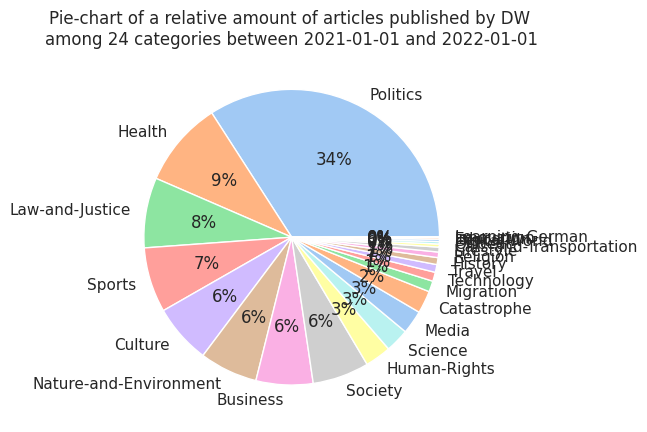

In [153]:
#count_values_for_columns(df_single)['dw_cat']

data_dw = count_values_for_columns(df_single)['dw_cat'].values
labels_dw = count_values_for_columns(df_single)['dw_cat'].index
title=('Pie-chart of a relative amount of articles published by DW \n'+
       'among ' +str(len(labels_dw)) + ' categories between ' +start_date+' and ' +end_date)

plot_pie(data_dw,labels_dw,title)

In [154]:
#google keywords to dw categories
# Load Google data
google_usa_json='../data/interim/2021-daily-trending-searches.json'
google_world_json='../data/interim/2021_daily_trending_searches_World.json'
df_google = pd.read_json(google_world_json, orient ='split', compression = 'infer')

# Keeps only google data within DW data date range
start_date_dw=start_date
end_date_dw=end_date
df_google.sort_values(by ='date', inplace = True) 
mask = (pd.to_datetime(df_google['date']) > start_date_dw) & (pd.to_datetime(df_google['date']) <= end_date_dw)
df_google_subset = df_google.loc[mask].copy()
google_topic=df_google_subset['topic_title']
google_topic_type=df_google_subset['topic_title']

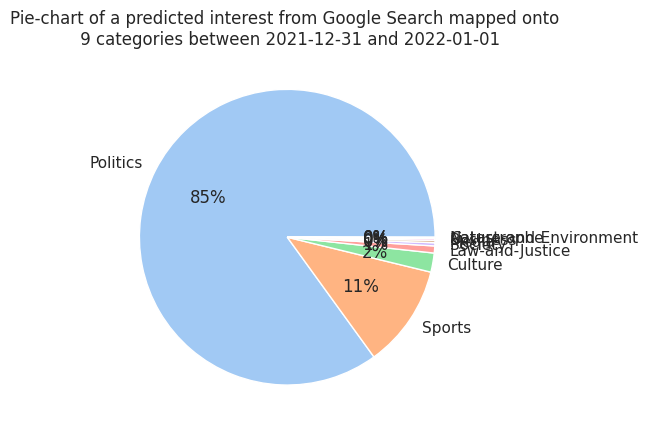

In [155]:
#predict categories for google searches topic title+type
google_data=df_google_subset['topic_title']+' '+df_google_subset['topic_type']

#google_result=run_predict_for_series(model_all_kw_check,df_google_subset['topic_type']) #only topic type
#google_result=run_predict_for_series(model_all_kw_check,df_google_subset['topic_title']) #only topic title
google_result=run_predict_for_series(model_all_kw_check,google_data) #topic title+type

#count amount GS words for each category
#count_values_for_columns(google_result)[1]
data_g = count_values_for_columns(google_result)[1].values
labels_g = count_values_for_columns(google_result)[1].index

google_start_date='2021-12-31'
#make pie plot for google searches
title_g=('Pie-chart of a predicted interest from Google Search mapped onto \n'+
       ' ' +str(len(labels_g)) + ' categories between ' +google_start_date+' and ' +end_date)

plot_pie(data_g,labels_g,title_g)

## Bar plots
bar plot to compare DW categories and Google categories 
for the same time period

In [156]:
labels_dw.unique()

Index(['Politics', 'Health', 'Law-and-Justice', 'Sports', 'Culture',
       'Nature-and-Environment', 'Business', 'Society', 'Human-Rights',
       'Science', 'Media', 'Catastrophe', 'Migration', 'Technology', 'Travel',
       'History', 'Religion', 'Lifestyle', 'Cars-and-Transportation',
       'Offbeat', 'Digital-World', 'Education', 'Innovation',
       'Learning-German'],
      dtype='object')

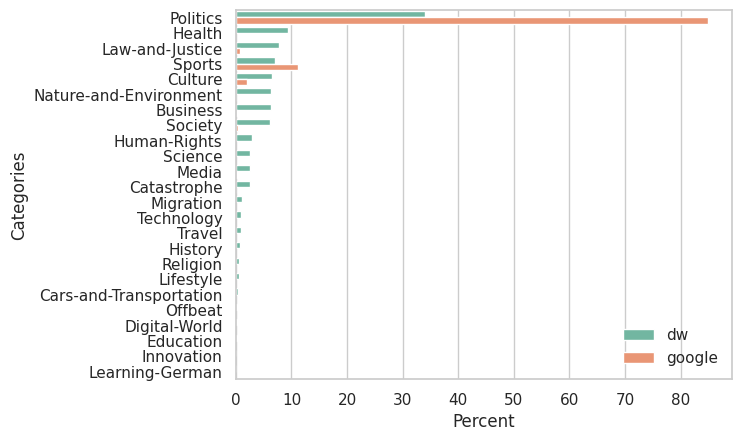

In [215]:
import seaborn as sns
#sns.set_theme(style="whitegrid")

ds2 = pd.DataFrame({'Categories':labels_dw,'Percent':100*data_dw/data_dw.sum().round(1)})
ds1 = pd.DataFrame({'Categories':labels_g,'Percent':100*data_g/data_g.sum().round(1)})
# for cat in ds2['Categories'].unique():
#     if cat not in ds1['Categories'].unique():
#         ds1.loc[len(ds1)] = [cat, 0]

ds2['source'] = 'dw'
ds1['source'] = 'google'
dss = pd.concat([ds2, ds1])

#sns.barplot(x='Categories', y='Percent', hue='source', data=dss, palette='Set2')
sns.barplot(x='Percent', y='Categories', hue='source', data=dss, palette='Set2')
sns.color_palette("deep")
#g=plt.tight_layout()
#g=plt.xticks(rotation=90)
#plt.yticks(rotation=90)
plt.legend(loc='lower right',frameon=False)
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel("Categories lala")
ax.grid(False)


## Heatmap 

In [158]:
# #HeatMap
# #actual categories
# category_id_df = df_clean['cleanFocusCategory'].drop_duplicates().sort_values()
# #predicted categories
# model = LinearSVC()
# X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df_clean.index, test_size=0.33, random_state=0,stratify=labels)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# from sklearn.metrics import confusion_matrix
# conf_mat = confusion_matrix(y_test, y_pred)
# fig, ax = plt.subplots(figsize=(20,20))
# sns.heatmap(100*conf_mat/conf_mat.sum(axis=1)[:,None], annot=True, fmt='.0f', cmap='Blues', xticklabels=category_id_df.values, yticklabels=category_id_df.values)
# #sns.heatmap(conf_mat, annot=True, xticklabels=category_id_df.values, yticklabels=category_id_df.values)
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.title('Category prediction for each actual category (%)')
# plt.show()

In [159]:
# df_clean['cleanFocusCategory'].drop_duplicates().sort_values()

164475               Architecture
163047                       Arts
162651                   Business
163402    Cars and Transportation
162663                Catastrophe
170088                    Climate
162659                  Conflicts
170706                 Corruption
162690                      Crime
162736                    Culture
169422                      Dance
162879              Digital World
172215                  Diversity
162812                  Education
165048                   Equality
163707                       Film
163055              Food Security
163723          Freedom of Speech
163593              Globalization
162655                     Health
162809                    History
162658               Human Rights
166851                 Innovation
162721            Law and Justice
169555            Learning German
162729                  Lifestyle
165532                 Literature
154902                      Media
162755                  Migration
163143        

In [189]:
#HeatMap for predicting dw categories based on dw data
#actual categories
category_id_df = result['dw_cat'] #data #count_values_for_columns(result)['dw_cat'].index
#predicted categories
# model = LinearSVC()
# X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df_clean.index, test_size=0.33, random_state=0,stratify=labels)
# model.fit(X_train, y_train)
y_test=data_dw #
y_pred = count_values_for_columns(result)[1].index

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(100*conf_mat/conf_mat.sum(axis=1)[:,None], annot=True, fmt='.0f', cmap='Blues', xticklabels=category_id_df.values, yticklabels=category_id_df.values)
#sns.heatmap(conf_mat, annot=True, xticklabels=category_id_df.values, yticklabels=category_id_df.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Category prediction for each actual category (%)')
plt.show()

KeyboardInterrupt: 

In [ ]:


# #alternative plot for google predictions when predicting 2 categories with fasttext
# title_g2=('Pie-chart of a predicted interest from Google Search mapped onto \n'+
#        ' ' +str(len(labels)) + ' categories between ' +start_date+' and ' +end_date+
#        '\n when predicting 2 categories')
# data_g2 = count_values_for_columns(google_result)[2].values
# labels_g2 = count_values_for_columns(google_result)[2].index

# plot_pie(data_g2,labels_g2,title_g2)

In [ ]:
#prediction of categories from google search words loook reasonable
google_result[80:110]

## Pie charts 2

In [186]:
#DW
#predict dw category for each kw
result=run_predict_for_series(model_all_kw_check,single_kw)

result=result.merge(df_single, left_index=True, right_on='dw_kw')
#count_values_for_columns(result)[]

In [205]:
result

,1,2,dw_cat,dw_kw
162649,"(Law-and-Justice,)","(Law-and-Justice, Politics)",Politics,andre hill
162649,"(Politics,)","(Politics, Health)",Politics,police
162693,"(Politics,)","(Politics, Health)",Society,police
162665,"(Politics,)","(Politics, Health)",Health,police
162846,"(Politics,)","(Politics, Health)",Politics,police
...,...,...,...,...
172665,"(Politics,)","(Politics, Catastrophe)",Business,umaro sissoco embaló
172672,"(Politics,)","(Politics, Law-and-Justice)",Law-and-Justice,gioia tauro
172654,"(Politics,)","(Politics, Law-and-Justice)",Politics,new years address
172657,"(Catastrophe,)","(Catastrophe, Politics)",Catastrophe,boulder county


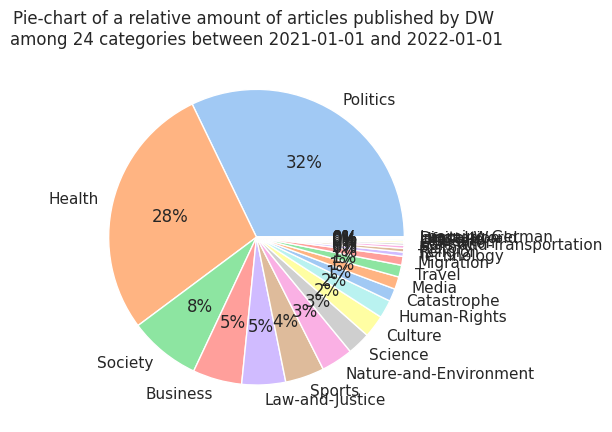

In [187]:
#plot predicted DW categories
data = count_values_for_columns(result)['dw_cat'].values
labels = count_values_for_columns(result)['dw_cat'].index
title=('Pie-chart of a relative amount of articles published by DW \n'+
       'among ' +str(len(labels)) + ' categories between ' +start_date+' and ' +end_date)


plot_pie(data,labels,title)

In [188]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# #define data
# data_pred = val_counts_for_cols[1].values
# labels_pred = val_counts_for_cols[1].index
# title_pred='Pie-chart of a relative amount of predicted categories from DW keywords\nfor ' +str(len(labels)) + ' categories between ' +start_date+' and ' +end_date

# plot_pie(data_pred,labels_pred,title_pred)

NameError: name 'val_counts_for_cols' is not defined

In [ ]:
# data_pred2 = val_counts_for_cols[1].values
# labels_pred2 = val_counts_for_cols[1].index
# title_pred2='Pie-chart of a relative amount of predicted categories from DW keywords\nfor ' +str(len(labels)) + ' categories between ' +start_date+' and ' +end_date +'\n when predicting 2 categories'

# plot_pie(data_pred2,labels_pred2,title_pred2)